# Linear Regression

## Normal Equation (Direct Way for calculating the values of '𝝷')

In [4]:
import numpy as np

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3]
])
y = np.array([
    [3],
    [5],
    [8]
])

theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta.round(2))   
# 0.33 ← θ₀ (bias)
# 2.5  ← θ₁ (hours weight)

[[0.33]
 [2.5 ]]


In [5]:
#Calculation for mean square error(mse)
y_pred=X @ theta
errors=y_pred-y

mse=(errors.T @ errors)/len(y)
print(mse)

[[0.05555556]]


In [6]:
np.random.seed(42)
m=100
X=2* np.random.rand(m,1)
noise=np.random.randn(m,1)

y=6 + 5*X+noise


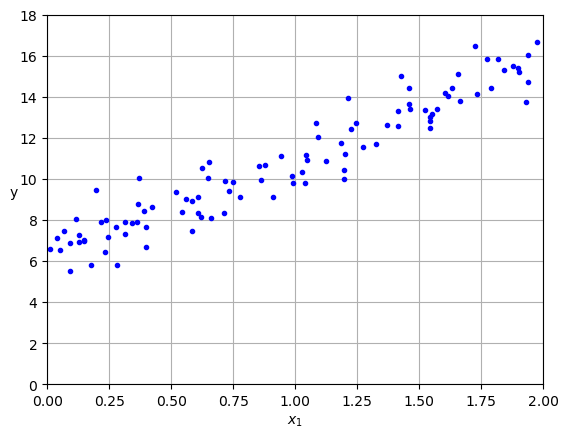

In [7]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,18])
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.grid()
plt.show()

In [8]:
from sklearn.preprocessing import add_dummy_feature
X_bias=add_dummy_feature(X)

theta_best=np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
theta_best

array([[6.21509616],
       [4.77011339]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print(X_new)
print(X_new_b)
print(y_predict)


[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 6.21509616]
 [15.75532293]]


Text(0, 0.5, 'y')

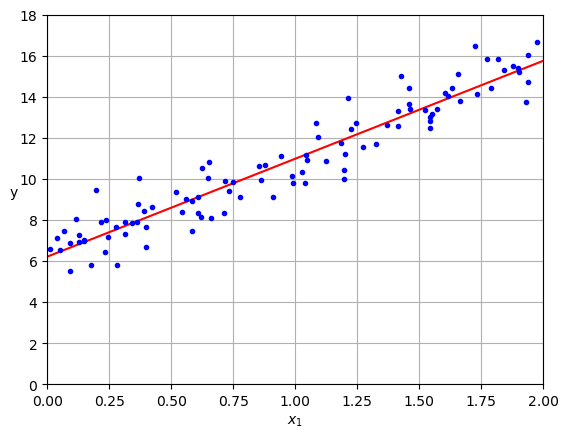

In [10]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,18])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([6.21509616]), array([[4.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[ 6.21509616],
       [15.75532293]])

In [13]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_bias,y,rcond=1e-6)
theta_best_svd

array([[6.21509616],
       [4.77011339]])

In [14]:
np.linalg.pinv(X_bias)@y

array([[6.21509616],
       [4.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [17]:
eta=0.1   #Learning Rate
n_epoch=1000 # How many iterations over the dataset
m=len(X_bias) #Number of instances

np.random.seed(42)
theta=np.random.randn(2,1)  # parameters are randomly initialized

for epoch in range(n_epoch):
    gradents=2/m * X_bias.T @ (X_bias @ theta-y)
    theta=theta - eta * gradents




In [18]:
theta

array([[6.21509616],
       [4.77011339]])

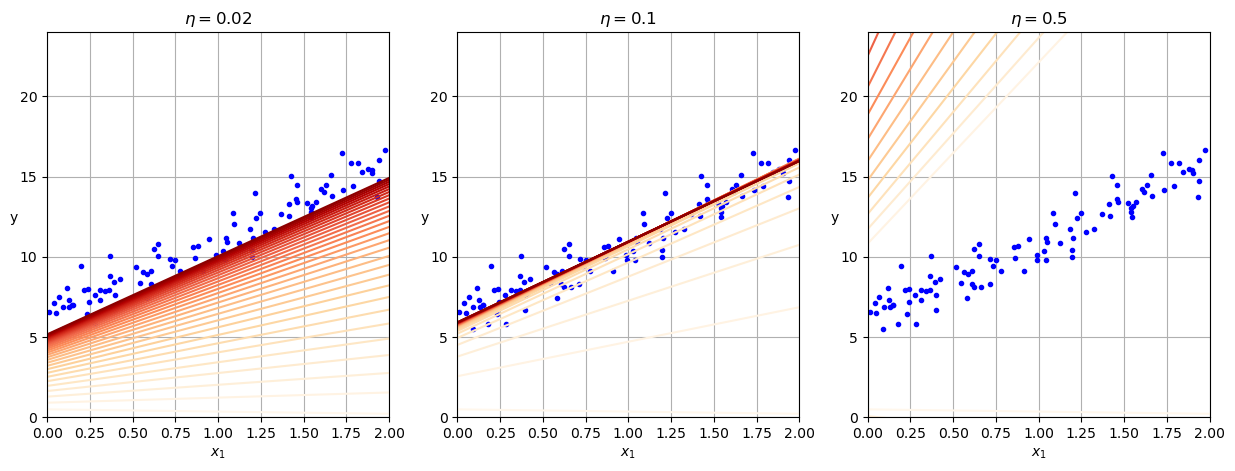

In [19]:
import matplotlib as mpl

def plot_gradient_descent(theta,eta):
    m=len(X_bias)
    n_epoch=1000
    n_shown=30
    plt.plot(X,y,"b.")
    theta_path=[]
    for epoch in range(n_epoch):
        if epoch<n_shown:
            y_predict=X_new_b @ theta
            color=mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)
        gradents=2/m * X_bias.T @ (X_bias @ theta-y)
        theta=theta - eta * gradents
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.ylabel("y",rotation=0)
    plt.axis([0, 2, 0, 24])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(15,5))
plt.subplot(131)
plot_gradient_descent(theta,0.02)
plt.subplot(132)
theta_path_bgd=plot_gradient_descent(theta,0.1)
plt.subplot(133)
plot_gradient_descent(theta,0.5)
plt.show()
        
            
        

In [20]:
tolerance=1e-6
for epoch in range(1000):
     gradents=2/m * X_bias.T @ (X_bias @ theta-y)
     if np.linalg.norm(gradents)<tolerance:
        print(f"Stopped at epoch {epoch}")
        break
     theta=theta-eta*gradents


Stopped at epoch 370


## Stochastic Gradient Descent

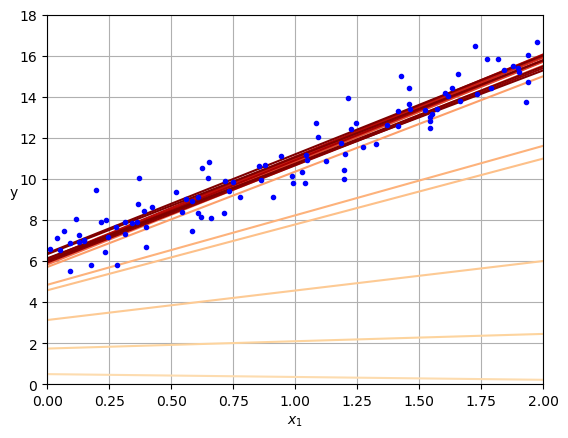

In [22]:
theta_path_sgd=[]
n_epoch=50
t0,t1=5,50

def learning_shedule(t):
    return t0/(t+t1)

n_shown=20

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epoch):
    for iteration in range(m):

        if epoch==0 and iteration<n_shown:
            y_predict=X_new_b@theta
            color=mpl.colors.rgb2hex(plt.cm.OrRd(iteration/n_shown+0.2))
            plt.plot(X_new,y_predict,color=color)
        random_index=np.random.randint(m)
        xi=X_bias[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T@(xi@theta-yi)
        eta=learning_shedule(epoch*m+iteration)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,"b.") 
plt.grid()
plt.axis([0,2,0,18])
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()



In [23]:
theta

array([[6.21082141],
       [4.74850547]])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,
                    n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [25]:
sgd_reg.intercept_,sgd_reg.coef_

(array([6.21243504]), array([4.77301413]))

## Mini-Batch Gradient Descent

[[6.25224121]
 [4.78970191]]


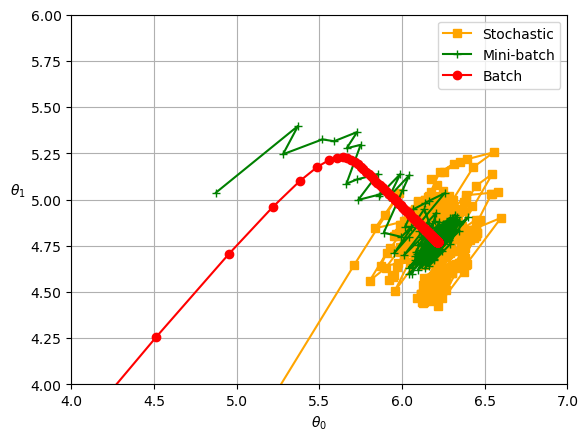

In [27]:
from math import ceil

n_epoch=50
minibatch_size=20
n_batches_per_epoch=ceil(m/minibatch_size)

np.random.seed(42)
theta=np.random.randn(2,1)
t0,t1=200,1000

def learning_schedule(t):
    return t0/(t+t1)
theta_path_mgd=[]

for epoch in range(n_epoch):
    shuffled_indices=np.random.permutation(m)
    X_bias_shuffled=X_bias[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for iteration in range(0,n_batches_per_epoch):
        idx=iteration*minibatch_size
        xi=X_bias_shuffled[idx:idx+minibatch_size]
        yi=y_shuffled[idx:idx+minibatch_size]
        gradients=2/minibatch_size*xi.T@(xi@theta-yi)
        eta=learning_schedule(epoch*n_batches_per_epoch+iteration)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)
print(theta)
theta_path_bgd=np.array(theta_path_bgd)  # Convert Python list in numpy array
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)

plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],marker="s",color="orange",linestyle="-",label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],marker="o",color="red",linestyle="-",label="Batch")
plt.grid()
plt.legend()
plt.axis([4,7,4,6])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$    ",rotation=0)
plt.show()


# Polynomial Regression

In [29]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3   # Shift to [–3, 3]
y=0.4*X**2 + X + 3 + np.random.randn(m,1)



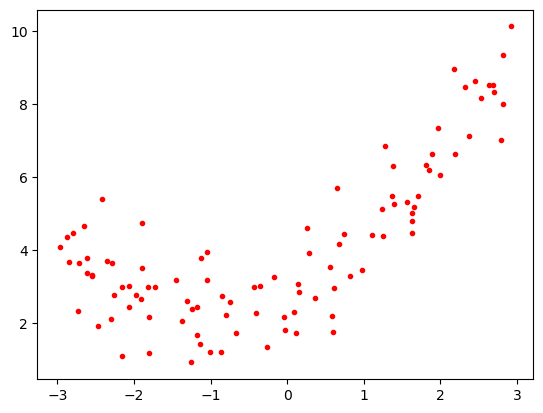

In [30]:
plt.plot(X,y,"r.")
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])


[-0.75275929]
[-0.75275929  0.56664654]


In [32]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

In [33]:
lin_reg.coef_,lin_reg.intercept_

(array([[0.93366893, 0.46456263]]), array([2.78134581]))

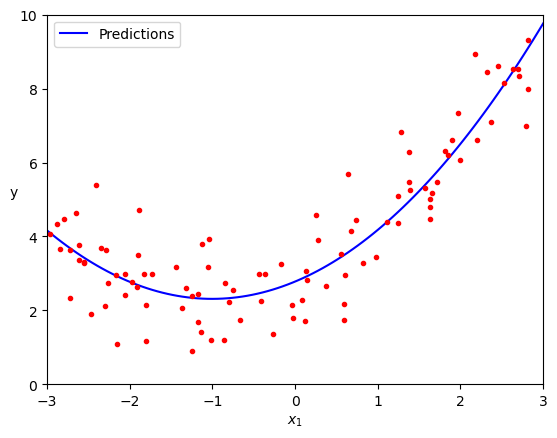

In [34]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)

plt.plot(X_new,y_new,"b-",label="Predictions")
plt.plot(X,y,"r.")
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()

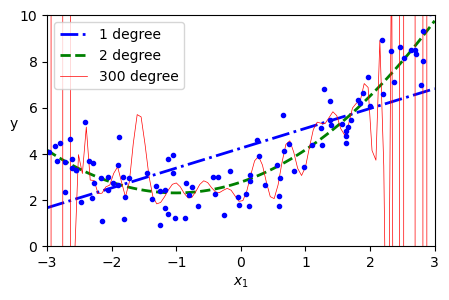

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
plt.figure(figsize=(5,3))

for style,width,degree in(("b-.",2,1),("g--",2,2),("r-",0.5,300)):
    poly_big_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=make_pipeline(poly_big_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_new_big=polynomial_regression.predict(X_new)
    label=f"{degree} degree"
    plt.plot(X_new,y_new_big,style,label=label,linewidth=width)
plt.axis([-3,3,0,10])
plt.legend()
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()

    

## Learning Curves

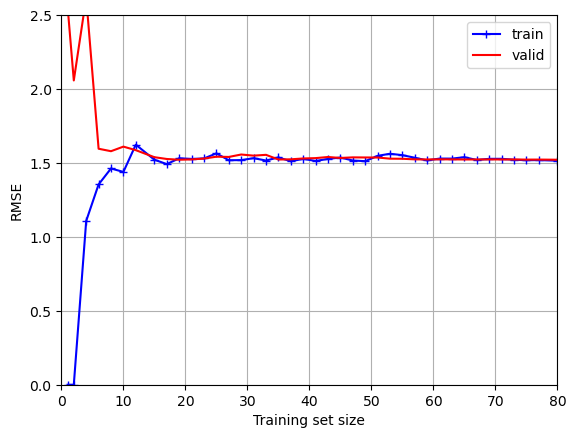

In [37]:
from sklearn.model_selection import learning_curve

train_sizes,train_score,valid_score=learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error"    
)
train_errors=-train_score.mean(axis=1)
valid_errors=-valid_score.mean(axis=1)

plt.plot(train_sizes,train_errors,"b-+",label="train")
plt.plot(train_sizes,valid_errors,"r-",label="valid")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0,80,0,2.5])
plt.grid()
plt.show()

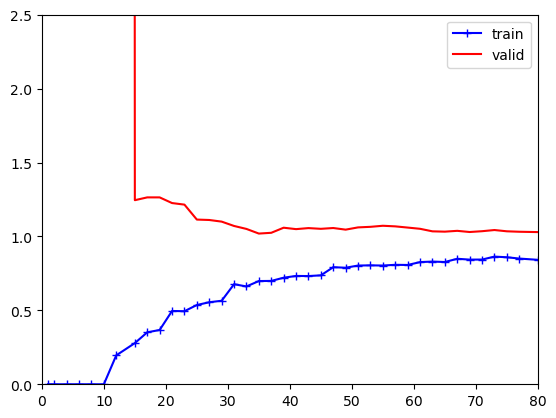

In [38]:
polynomial_regression=make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)
train_sizes,train_score,valid_score=learning_curve(
    polynomial_regression,
    X,y,
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors= -train_score.mean(axis=1)
valid_errors= -valid_score.mean(axis=1)

plt.plot(train_sizes,train_errors,"b-+",label="train")
plt.plot(train_sizes,valid_errors,"r-",label="valid")
plt.axis([0,80,0,2.5])
plt.legend()
plt.show()

# Ridge Regression

In [40]:
np.random.seed(42)
m=20
a=np.random.rand(m,1)
X=3*a
noise=np.random.randn(m,1)/1.5
y=1+ 0.7*X +noise
X_new=np.linspace(0,3,100).reshape(100,1)


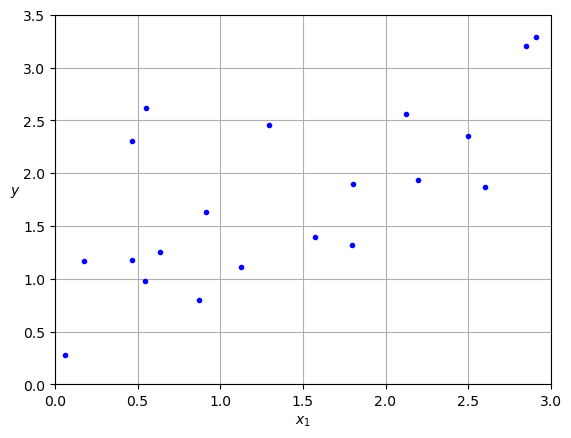

In [41]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [42]:
from sklearn.linear_model import Ridge

ridge_regression=Ridge(alpha=0.1,solver="cholesky")
ridge_regression.fit(X,y)
ridge_regression.predict([[1.5]])

array([[1.85310253]])

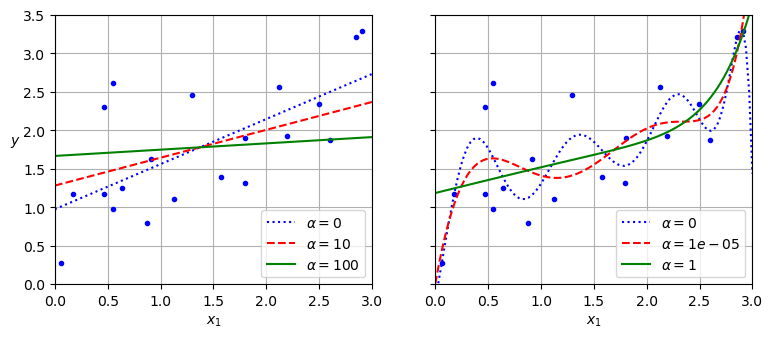

In [48]:
def plot_model(model_class,polynomial,alphas,**model_kwargs):
    plt.plot(X,y,"b.")
    for alphas,style in zip(alphas,("b:","r--","g-")):
        if alphas>0:
            model=model_class(alphas,**model_kwargs)
        else:
            model=LinearRegression()
        if polynomial:
            model=make_pipeline(
                PolynomialFeatures(degree=10,include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X,y)
        y_new_regularized=model.predict(X_new)
        plt.plot(X_new,y_new_regularized,style,label=fr"$\alpha ={alphas}$")
    
    plt.legend()
    plt.grid()
    plt.axis([0, 3, 0, 3.5])
    plt.xlabel("$x_1$")
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


In [58]:
sgd_reg=SGDRegressor(penalty="l2",alpha=0.1/m,tol=None,
                    max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.8529369])